In [14]:
# Kerakli bolgan barcha kutubxonalarni yuklab olamiz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


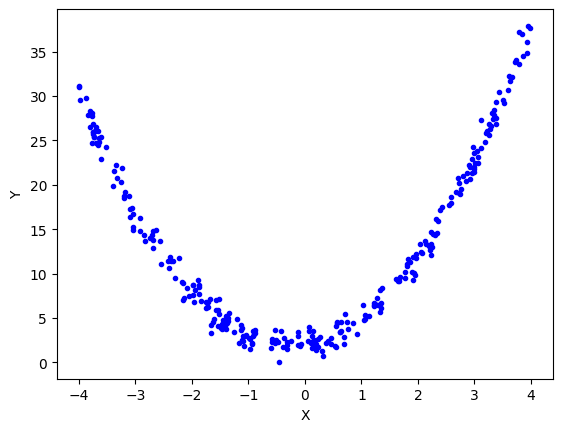

In [15]:
# np.random.rand(300, 1) - (0,1) oralig‘ida 300 ta tasodifiy son yaratadi.
# 8 * np.random.rand(300, 1) - (0,8) oralig‘iga kengaytiradi, - 4 - (-4, 4) oralig‘iga suradi.
X = 8 * np.random.rand(300, 1) - 4
# y – ikkinchi darajali polinomga mos keluvchi qiymatlar
y = 2 * X**2 + 1*X + 2 + np.random.randn(300, 1)
# Malumotlarni vizual korsatadi
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [29]:
# BU yerda datamizni trein va testga ajratib beradi 80% datamiz train uchun 20% datamiz test uchun ajratiladi
# random_state=5 bundan foydalanishdan maqsad har doim bir xil natija qaytarish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [30]:
# Madel yaratdik
lr = LinearRegression()


In [32]:
# Madelimizga datamizni o'rgatamiz bu qadamda
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# Test to'plamidagi bashorat va Modelni baholash uchun R² dan foydalanganmiz
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

-0.13203198397496174


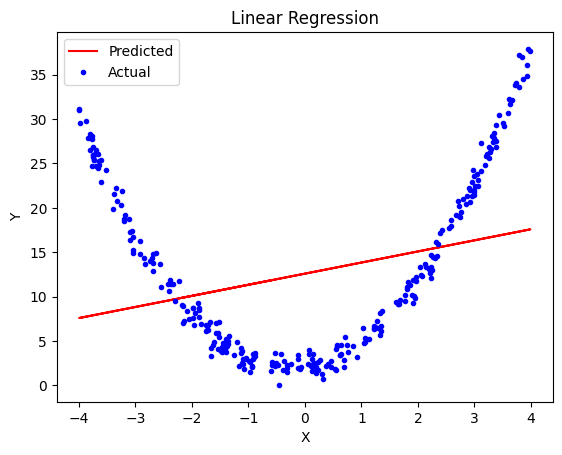

In [34]:
# Vizual xolatda oynaga chiqardik
plt.plot(X_train, lr.predict(X_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression")
plt.legend(["Predicted", "Actual"])
plt.show()

In [35]:
#  Polinomial regressiyani qo‘llash uchun kutubxonani yuklab oldik
from sklearn.preprocessing import PolynomialFeatures

In [36]:
# X o‘zgaruvchini 2-darajali polinomga aylantiradi. X = [x] bo‘lsa, yangi X_poly = [1, x, x²] bo‘ladi.
poly = PolynomialFeatures(degree=2, include_bias=True)

In [45]:
# Polinomial xususiyatlarni yaratish. X_train ni polinomial shaklga o‘giradi.
X_train_trans = poly.fit_transform(X_train)

In [54]:
# Chiziqli madel yaratdik
lr = LinearRegression()


In [55]:
# Polinomial xususiyatlar bilan o‘rganadi.
lr.fit(X_train_trans, y_train)

LinearRegression()

In [58]:
# Test to‘plamiga nisbatan bashorat qiladi.
y_pred = lr.predict(poly.fit_transform(X_test))

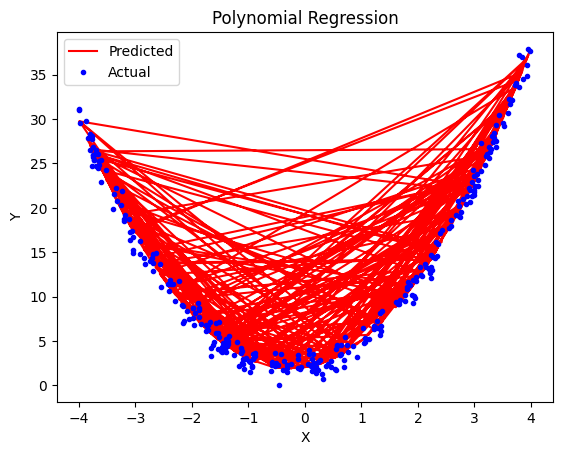

In [59]:
# Vizual ko'rinish
plt.plot(X_train, lr.predict(X_train_trans), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression")
plt.legend(["Predicted", "Actual"])
plt.show()

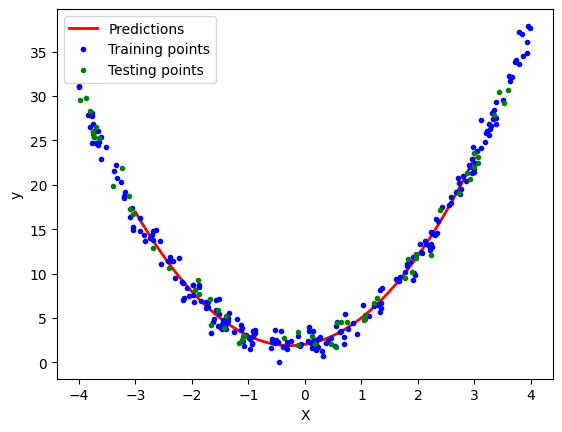

In [50]:
# Vizual ko'rinish
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [51]:
# Modelni baholash
# MAE – o‘rtacha mutloq xato, MSE – o‘rtacha kvadratik xato.
# R² – modelning aniqligi.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 0.8536049048832643
MSE: 1.012959660965047
R2: 0.989065754761727
